In [1]:
from config.definitions import ROOT_DIR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os

from matplotlib.pyplot import rcParams

plt.style.use('seaborn-whitegrid')


In [2]:
fees = pd.read_csv(os.path.join(ROOT_DIR, 'data\\raw',
                   'netflix-price-per-nation.csv'))

fees.head()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74


In [3]:
fees = fees.rename(columns={'Total Library Size': 'Tot_lib_size', 'No. of TV Shows': 'No_tv_shows', 'No. of Movies': 'No_of_movies',
                            'Cost Per Month-Basic($)': 'Basic_cost_per_month($)', 'Cost Per Month - Standard($)': 'Stand_cost_per_month($)',
                            'Cost Per Month - Premium($)': 'Prem_cost_per_month($)', })


In [4]:
fees.describe()

,Tot_lib_size,No_tv_shows,No_of_movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,5314.415385,3518.953846,1795.461538,8.368462,11.990000,15.612923
std,980.322633,723.010556,327.279748,1.937819,2.863979,4.040672
min,2274.000000,1675.000000,373.000000,1.970000,3.000000,4.020000
25%,4948.000000,3154.000000,1628.000000,7.990000,10.710000,13.540000
50%,5195.000000,3512.000000,1841.000000,8.990000,11.490000,14.450000
75%,5952.000000,3832.000000,1980.000000,9.030000,13.540000,18.060000
max,7325.000000,5234.000000,2387.000000,12.880000,20.460000,26.960000


Text(0.5, 1.0, 'No of TV Shows per Country')

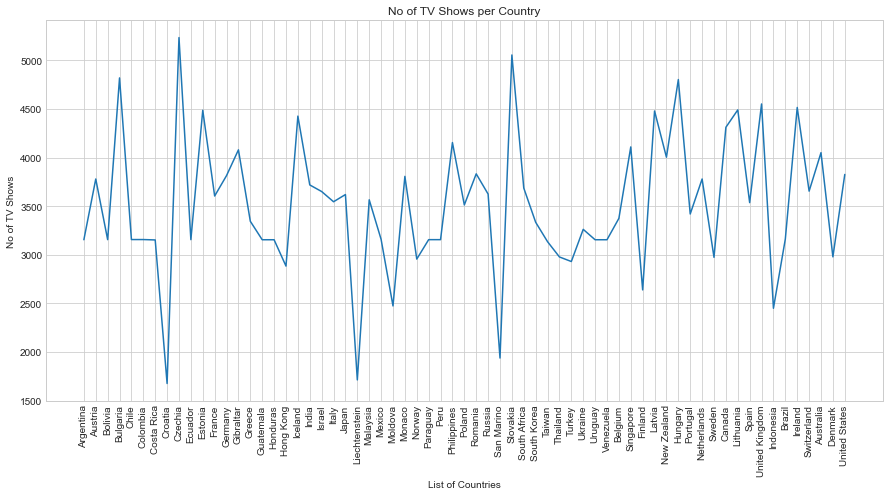

In [5]:
rcParams['figure.figsize'] = 15,7

nation = fees['Country']
shows = fees['No_tv_shows']

plt.xticks(rotation=90)
plt.plot(nation, shows)
plt.xlabel('List of Countries')
plt.ylabel('No of TV Shows')
plt.title('No of TV Shows per Country')

In [6]:
max = fees.query('No_tv_shows == 5234')
max

,Country,Tot_lib_size,No_tv_shows,No_of_movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
8,Czechia,7325,5234,2091,8.83,11.49,14.15


In [7]:
min = fees.query('No_tv_shows == 1675')
min

,Country,Tot_lib_size,No_tv_shows,No_of_movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
7,Croatia,2274,1675,599,9.03,11.29,13.54


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


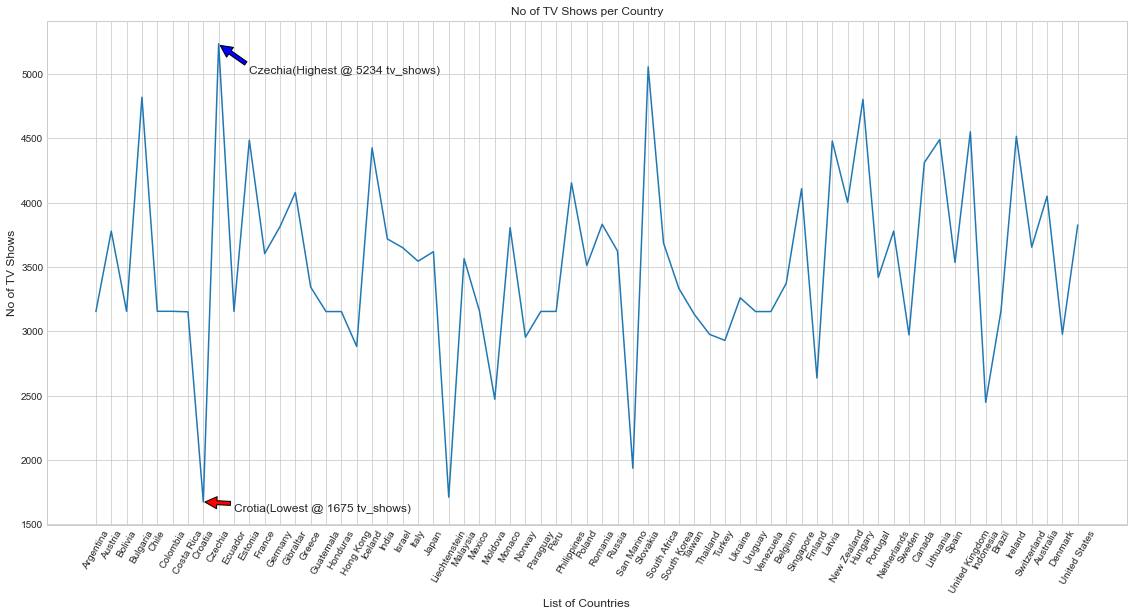

In [8]:
# Object-oriented Method
nation = fees['Country']
shows = fees['No_tv_shows']

rcParams['figure.figsize'] = 15,7

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.set_xticks(range(65)) #We have 65 countries in the dataset
ax.set_xticklabels(fees.Country, rotation=60, fontsize='medium')
ax.set_title('No of TV Shows per Country', fontsize='large')
ax.set_xlabel('List of Countries', fontsize='large')
ax.set_ylabel('No of TV Shows', fontsize='large')
ax.legend(loc='best')

ax.annotate('Czechia(Highest @ 5234 tv_shows)', fontsize='large', xy=(8, 5230), xytext=(10, 5000),
            arrowprops=dict(facecolor='blue', shrink=0.05), xycoords='data')  # , horizontalalignment='left', verticalalignment='top')
ax.annotate('Crotia(Lowest @ 1675 tv_shows)', fontsize='large', xy=(7, 1675), xytext=(9, 1600),
            arrowprops=dict(facecolor='red', shrink=0.05))

plt.plot(nation, shows)
plt.grid(True)
plt.show()

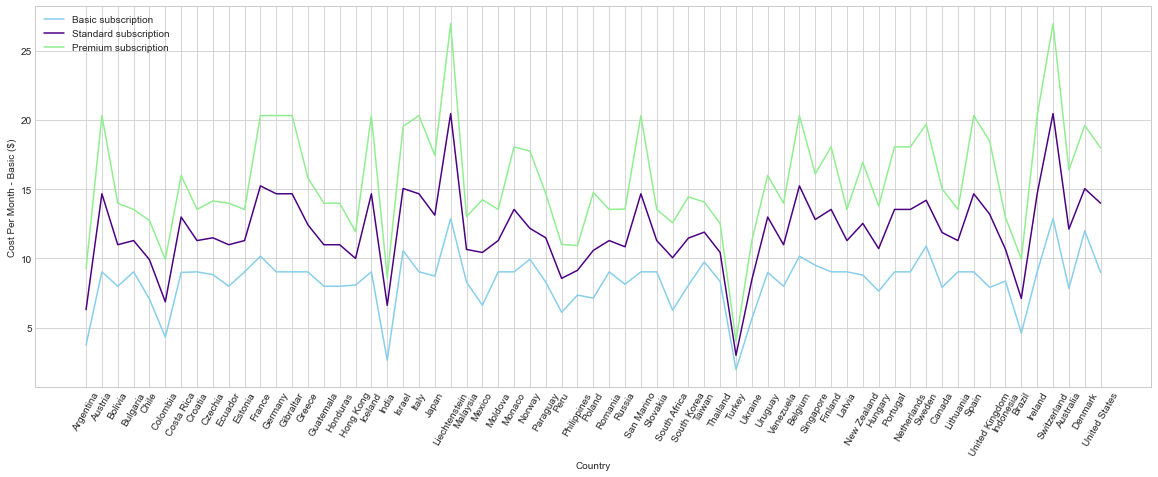

In [9]:
rcParams['figure.figsize'] = 20, 7

nation = fees['Country']
basic = fees['Cost Per Month - Basic ($)']
standard = fees['Cost Per Month - Standard ($)']
premium = fees['Cost Per Month - Premium ($)']

sb.lineplot(data=fees, y='Cost Per Month - Basic ($)', x='Country',
            color='skyblue', label='Basic subscription')
sb.lineplot(data=fees, y='Cost Per Month - Standard ($)',
            x='Country', color='indigo', label='Standard subscription')
sb.lineplot(data=fees, y='Cost Per Month - Premium ($)', x='Country',
            color='lightgreen', label='Premium subscription')
#sb.lineplot(data=fees, y='Tot_lib_size', x='Country', color='lightgreen', label='Premium subscription')
plt.xticks(rotation=60, fontsize='medium')


plt.legend(loc='best')
plt.show()


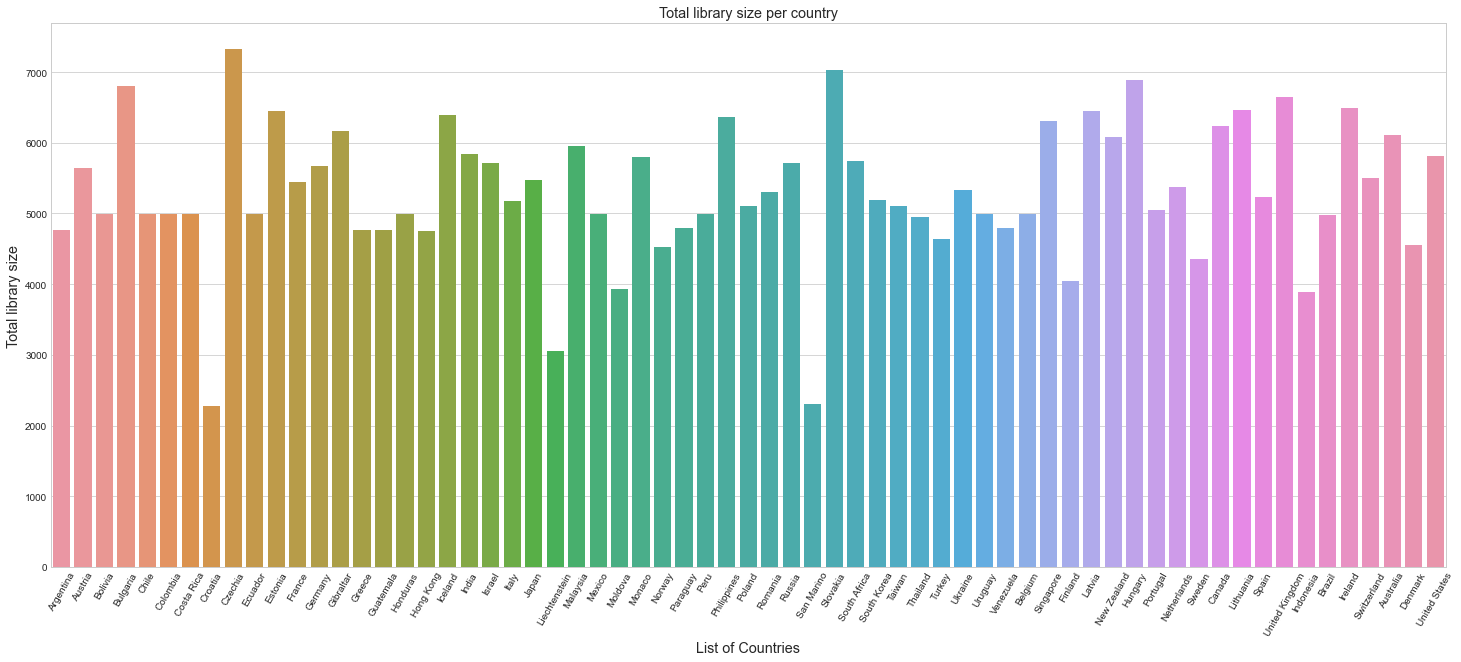

In [10]:
bar, ax = plt.subplots(figsize=(25, 10))
ax = sb.barplot(x='Country', y='Tot_lib_size', data=fees)
ax.set_title('Total library size per country', fontsize='x-large')
ax.set_xlabel('List of Countries', fontsize='x-large')
ax.set_ylabel('Total library size', fontsize='x-large')
#ax.bar_label(ax.add_container[0])

plt.xticks(rotation=60)
#plt.tight_layout()
plt.show()


In [11]:
basic = fees['Cost Per Month - Basic ($)']
standard = fees['Cost Per Month - Standard ($)']
premium = fees['Cost Per Month - Premium ($)']

standard.idxmin()

41

In [12]:
fees.iloc[41]

Country                          Turkey
Tot_lib_size                       4639
No_tv_shows                        2930
No_of_movies                       1709
Cost Per Month - Basic ($)         1.97
Cost Per Month - Standard ($)       3.0
Cost Per Month - Premium ($)       4.02
Name: 41, dtype: object